This based off of the tutorial from scanpy using pbmc 3K.
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

And heavily influenced by https://github.com/theislab/scanpy_usage/blob/master/170503_zheng17/zheng17.ipynb

We are interesting in doing 1month vs 30month, male kidney

In [83]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib.pyplot import rc_context

import os

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.23.5 scipy==1.8.1 pandas==1.5.3 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5


## Open files

In [84]:
data_path = f"{os.getcwd()}/../../data/single_cell_data/liver_sex/"

# data downloaded from figshare link provided in Tabula Muris Senis paper
# URL to data is provided in the BuDDI manuscript

in_file = f"{data_path}/Liver_droplet.h5ad"
test_in_file = f"{data_path}/tabula-muris-senis-droplet-processed-official-annotations-Liver.h5ad"
results_file = f"{data_path}/liver_droplet_processed.h5ad"
de_results_file = f"{data_path}/de_results.pkl"

adata = sc.read_h5ad(test_in_file)
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`



/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [85]:
adata = adata.raw.to_adata() # undo the filtering and the scaling

In [86]:
dense_matrix = adata.X.todense()
dense_matrix.shape

(7294, 20138)

In [87]:
adata.var

,n_cells
index,
Xkr4,147
Rp1,233
Sox17,27289
Mrpl15,95312
Lypla1,86096
...,...
LOC434960,5
LOC380994,32
LOC100041346,19


In [88]:
adata.obs

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,n_genes,sex,subtissue,tissue,tissue_free_annotation,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
AAACCTGAGATGTCGG-1-9-0-0,18m,MACA_18m_F_LIVER_HEPATOCYTES_51_AAACCTGAGATGTCGG,hepatocyte,NA,nan,droplet,18-F-51,1116.0,female,Hepatocytes,Liver,Liver,2801.0,0,5
AAAGCAATCGGAAATA-1-9-0-0,18m,MACA_18m_F_LIVER_HEPATOCYTES_51_AAAGCAATCGGAAATA,hepatocyte,NA,"Hepatocyte (Pericentral, Midlobular, Periportal)",droplet,18-F-51,1976.0,female,Hepatocytes,Liver,Liver,5403.0,1,1
AAAGTAGAGGCCCTTG-1-9-0-0,18m,MACA_18m_F_LIVER_HEPATOCYTES_51_AAAGTAGAGGCCCTTG,hepatocyte,NA,"Hepatocyte (Pericentral, Midlobular, Periportal)",droplet,18-F-51,1897.0,female,Hepatocytes,Liver,Liver,4893.0,1,1
AACCGCGAGAAACCGC-1-9-0-0,18m,MACA_18m_F_LIVER_HEPATOCYTES_51_AACCGCGAGAAACCGC,hepatocyte,NA,"Hepatocyte (Pericentral, Midlobular, Periportal)",droplet,18-F-51,1501.0,female,Hepatocytes,Liver,Liver,3692.0,1,1
AACTCCCAGTTGTCGT-1-9-0-0,18m,MACA_18m_F_LIVER_HEPATOCYTES_51_AACTCCCAGTTGTCGT,hepatocyte,NA,"Hepatocyte (Pericentral, Midlobular, Periportal)",droplet,18-F-51,1710.0,female,Hepatocytes,Liver,Liver,4258.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X_P7_1_TTGACTTTCCGCGGTA-1,3m,10X_P7_1_TTGACTTTCCGCGGTA,hepatocyte,CL:0000182,"Hepatocyte (Pericentral, Midlobular, Periportal)",droplet,3-F-57,NaN,female,nan,Liver,Liver,7569.0,1,1
10X_P7_1_TTGCCGTCAGCCAATT-1,3m,10X_P7_1_TTGCCGTCAGCCAATT,hepatocyte,CL:0000182,"Hepatocyte (Pericentral, Midlobular, Periportal)",droplet,3-F-57,NaN,female,nan,Liver,Liver,5145.0,1,1
10X_P7_1_TTGGAACTCTGACCTC-1,3m,10X_P7_1_TTGGAACTCTGACCTC,hepatocyte,CL:0000182,"Hepatocyte (Pericentral, Midlobular, Periportal)",droplet,3-F-57,NaN,female,nan,Liver,Liver,3534.0,6,7


## check number of cells per sample of interest

In [89]:
# how many of each mouse
adata.obs["mouse.id"].value_counts()

1-M-63     2320
30-M-3     1885
18-F-51     698
1-M-62      471
3-M-8/9     460
3-F-56      387
21-F-54     367
30-M-5      362
3-F-57      179
24-M-58      76
30-M-4       46
24-M-59      43
Name: mouse.id, dtype: int64

In [90]:
# how many of each cell
adata.obs.cell_ontology_class.value_counts()

hepatocyte                              2929
Kupffer cell                            2546
endothelial cell of hepatic sinusoid     675
NK cell                                  552
myeloid leukocyte                        307
B cell                                   203
plasmacytoid dendritic cell               41
hepatic stellate cell                     39
duct epithelial cell                       2
Name: cell_ontology_class, dtype: int64

## Preprocessing

In [91]:
# we are going to combine a few cell types
tab = adata.obs.groupby(['mouse.id', 'cell_ontology_class']).size()

tab.unstack()

cell_ontology_class,B cell,Kupffer cell,NK cell,duct epithelial cell,endothelial cell of hepatic sinusoid,hepatic stellate cell,hepatocyte,myeloid leukocyte,plasmacytoid dendritic cell
mouse.id,,,,,,,,,
1-M-62,1,5,2,0,25,2,434,1,1
1-M-63,16,609,245,0,495,26,881,34,14
3-F-56,0,12,2,0,9,1,363,0,0
3-F-57,0,1,0,0,5,0,173,0,0
3-M-8/9,0,0,0,2,5,0,453,0,0
18-F-51,24,221,109,0,27,2,267,40,8
21-F-54,39,25,32,0,14,2,250,4,1
24-M-58,0,0,0,0,2,0,74,0,0
24-M-59,3,18,7,0,5,1,4,5,0


In [92]:
# merge them
cell_dict = {'hepatic_stellate': ["hepatic stellate cell"],
            'hepatic_sinusoid': ["endothelial cell of hepatic sinusoid", "duct epithelial cell"],
             'b_cell': ["B cell"],
             'kupffer': ["Kupffer cell"],
             'NK': ["NK cell"], 
             'hepatocyte': ["hepatocyte"], 
             'myeloid_leukocyte': ["myeloid leukocyte"], 
             'plasmacytoid_dendritic_cell': ["plasmacytoid dendritic cell"]}

# Initialize empty column in cell metadata
adata.obs['names_merged'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.cell_ontology_class).isin(cell_dict[i])
    adata.obs.loc[ind,'names_merged'] = i

adata.obs.names_merged.value_counts()

hepatocyte                     2929
kupffer                        2546
hepatic_sinusoid                677
NK                              552
myeloid_leukocyte               307
b_cell                          203
plasmacytoid_dendritic_cell      41
hepatic_stellate                 39
Name: names_merged, dtype: int64

In [93]:
# we are going to only keep some samples
# ones that have enough cells per cell type
tab = adata.obs.groupby(['mouse.id', 'names_merged']).size()

tab.unstack()

names_merged,NK,b_cell,hepatic_sinusoid,hepatic_stellate,hepatocyte,kupffer,myeloid_leukocyte,plasmacytoid_dendritic_cell
mouse.id,,,,,,,,
1-M-62,2,1,25,2,434,5,1,1
1-M-63,245,16,495,26,881,609,34,14
3-F-56,2,0,9,1,363,12,0,0
3-F-57,0,0,5,0,173,1,0,0
3-M-8/9,0,0,7,0,453,0,0,0
18-F-51,109,24,27,2,267,221,40,8
21-F-54,32,39,14,2,250,25,4,1
24-M-58,0,0,2,0,74,0,0,0
24-M-59,7,3,5,1,4,18,5,0


In [94]:
# select samples that have enough cells

keep_samps = ["18-F-51", "30-M-5"]

adata.obs["keep"] = ["no"]*adata.n_obs
adata.obs.keep.iloc[np.where(np.isin(adata.obs["mouse.id"], keep_samps))[0]] = "yes"

adata = adata[np.where(adata.obs["keep"] == "yes")]

<ipython-input-94-e30570fc1115>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs.keep.iloc[np.where(np.isin(adata.obs["mouse.id"], keep_samps))[0]] = "yes"


In [95]:
# check we removed everything
tab = adata.obs.groupby(['mouse.id', 'names_merged']).size()

tab.unstack()

names_merged,NK,b_cell,hepatic_sinusoid,hepatic_stellate,hepatocyte,kupffer,myeloid_leukocyte,plasmacytoid_dendritic_cell
mouse.id,,,,,,,,
18-F-51,109,24,27,2,267,221,40,8
30-M-5,88,73,80,5,29,44,34,9


normalizing counts per cell
    finished (0:00:00)


/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


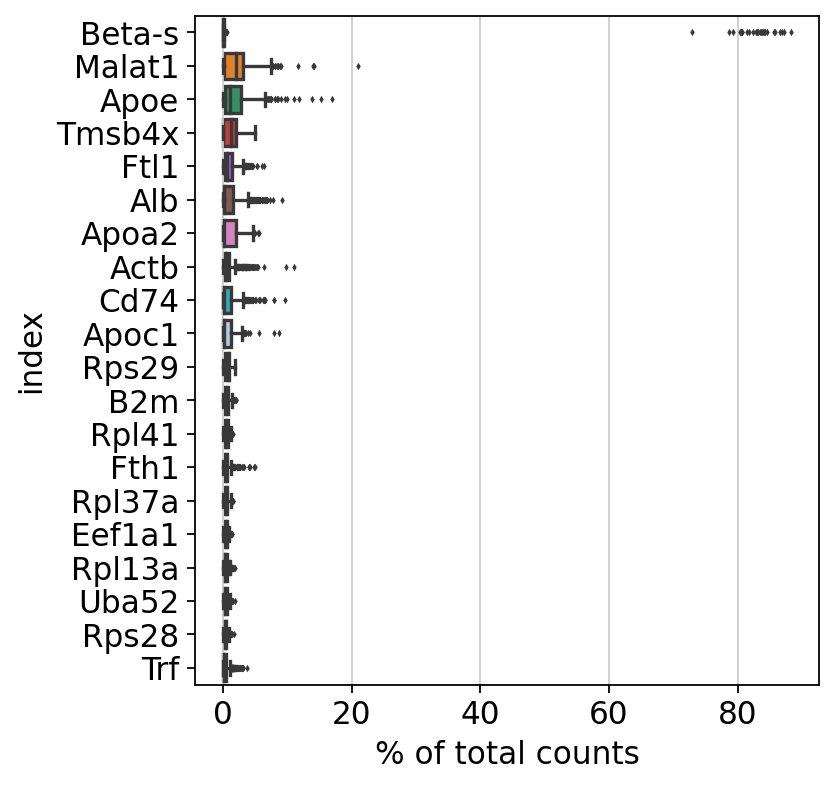

In [96]:
sc.pl.highest_expr_genes(adata, n_top=20, )


In [97]:
# filter out cells with less than 200 genes and genes expressed in less than 3 cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)


filtered out 6214 genes that are detected in less than 3 cells


In [98]:
adata.var_names[np.where(adata.var_names.str.startswith('MT'))]

Index([], dtype='object', name='index')

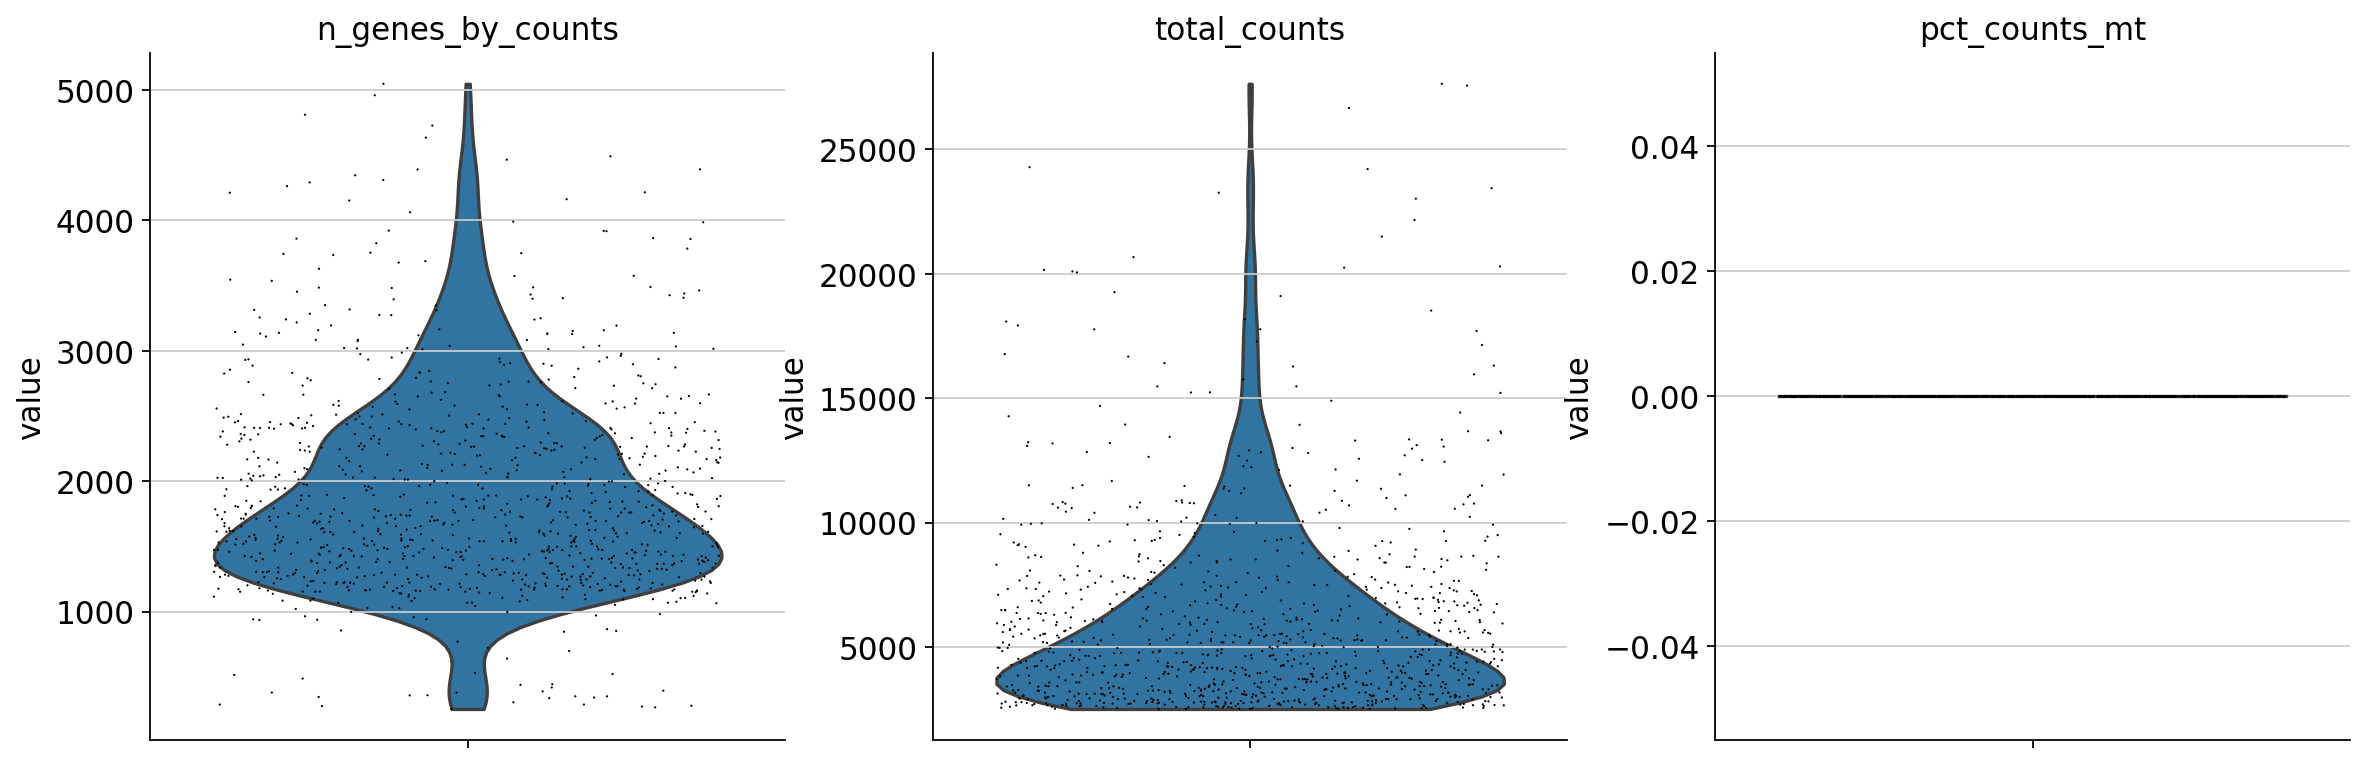

In [99]:
# remove genes with high mitochondrial content
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('Mt-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

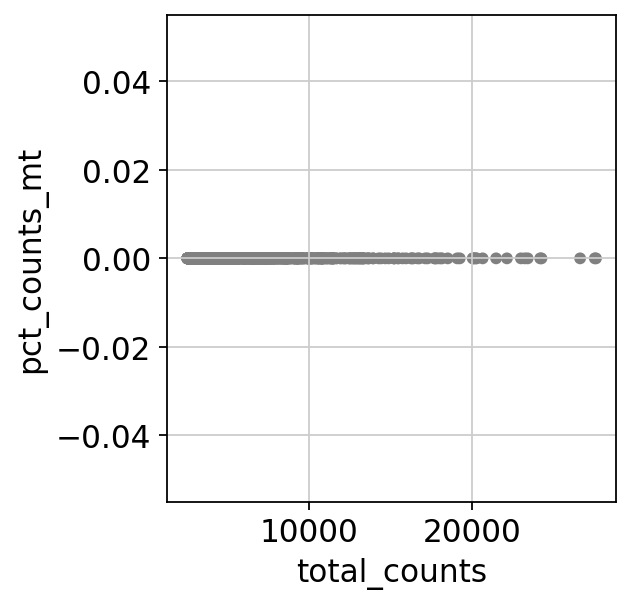

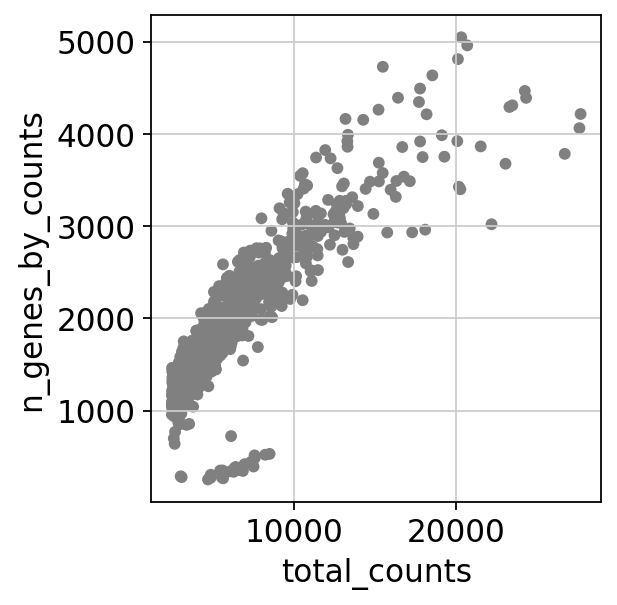

In [100]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [101]:
# slice the data based on the plots from above
# remove cells with more than 9000 genes
# remove cells with more than 5% MTgenes
# we aren't removing anything
adata = adata[adata.obs.n_genes_by_counts < 9000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [102]:
results_file

'/beevol/home/davidson/checkouts/sc_bulk_ood/sc_preprocessing/0_qc_notebooks/../../data/single_cell_data/liver_sex//liver_droplet_processed.h5ad'

In [103]:
# write it out before normalization
#adata.__dict__['_raw'].__dict__['_var'] = adata.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
#del adata.raw
adata.write(results_file)


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes


/beevol/home/davidson/miniconda3/envs/sc_bulk_ood/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


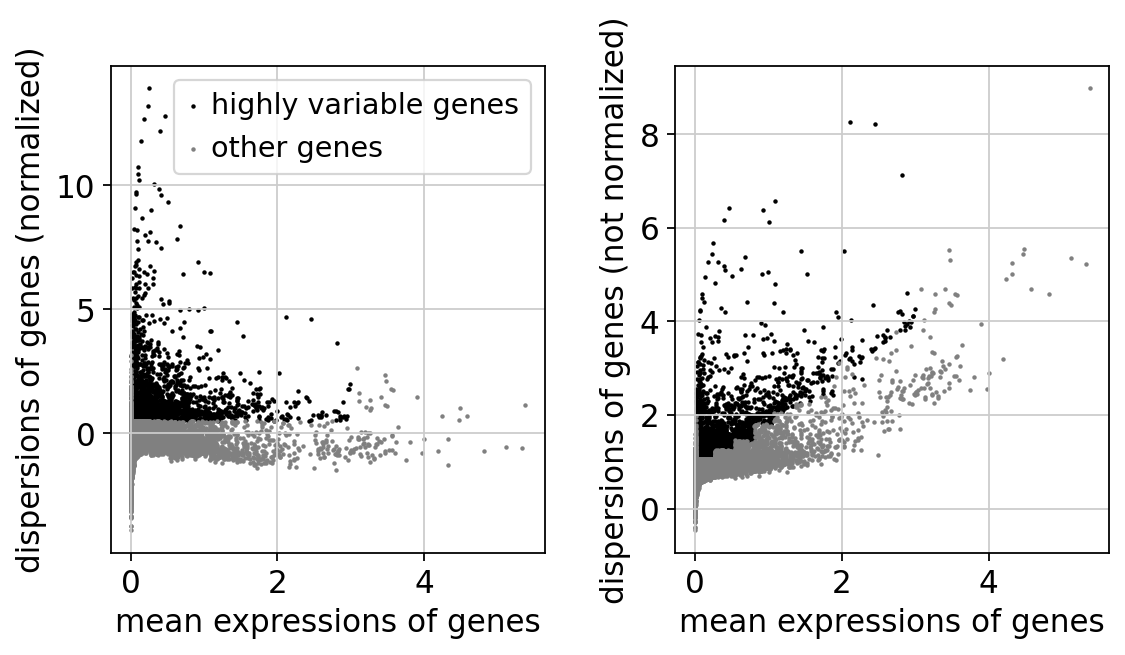

In [104]:
# normalize to 10K counts per cell
sc.pp.normalize_total(adata, target_sum=1e4)

# log data
sc.pp.log1p(adata)

# get high variance genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# and plot
sc.pl.highly_variable_genes(adata)

# now store the raw version of the data for our use later
adata.raw = adata


In [105]:
# now process the counts further for doing DE 
# analysis and the cell clustering
adata = adata[:, adata.var.highly_variable]

# regress out the signal
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

# scale the genes
sc.pp.scale(adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


    finished (0:00:10)


## PCA

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


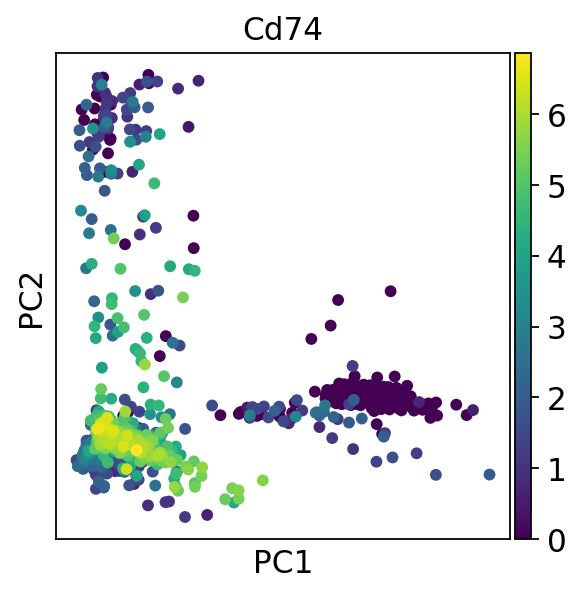

In [106]:
sc.tl.pca(adata, n_comps=50)
sc.pl.pca(adata, color='Cd74')


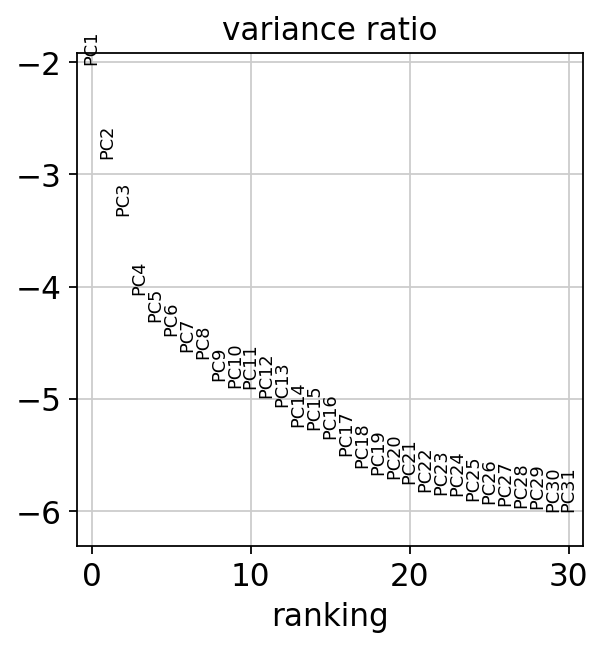

In [107]:
sc.pl.pca_variance_ratio(adata, log=True)


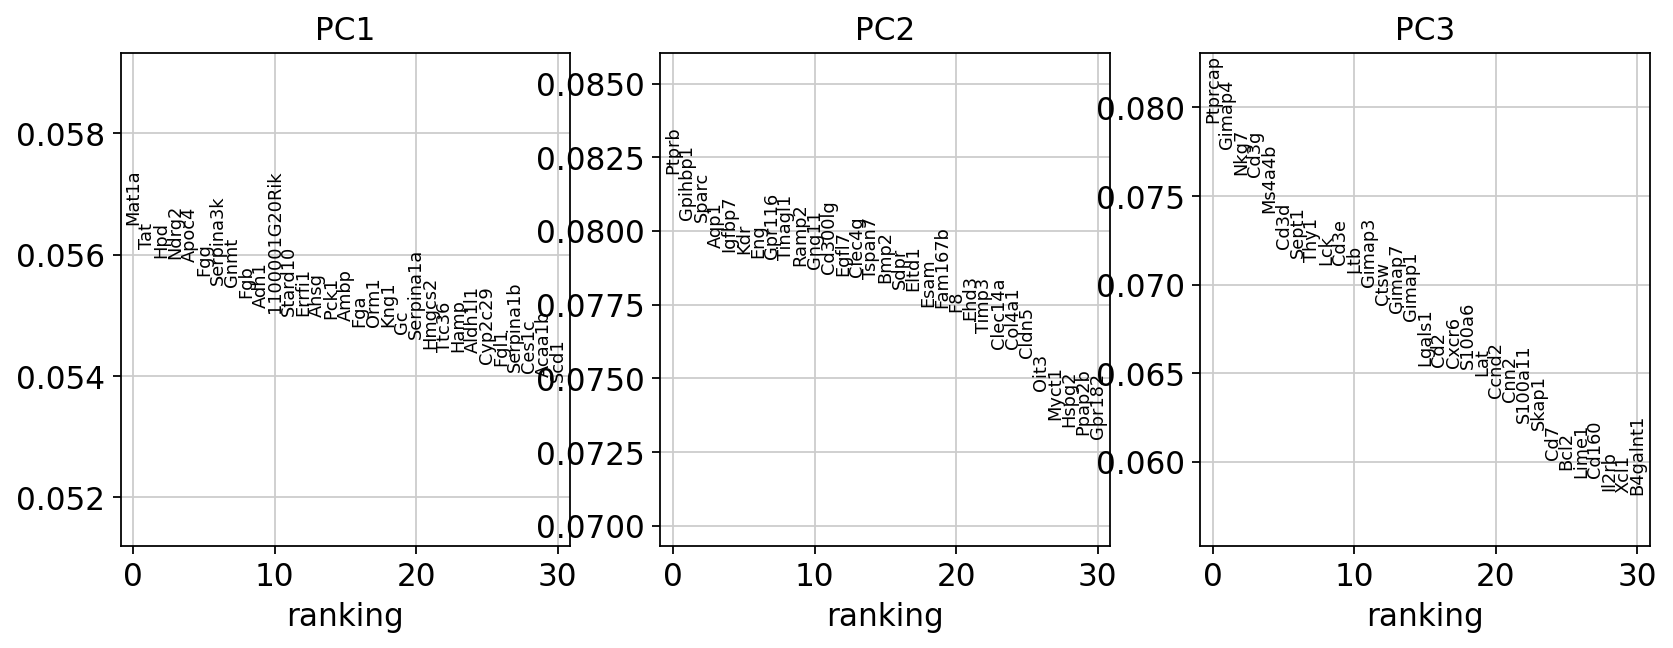

In [108]:
sc.pl.pca_loadings(adata, include_lowest=False)


## Compute and embed neighborhood graph

In [109]:
# valculate neighborhood graph
sc.pp.neighbors(adata)

# make umap
sc.tl.umap(adata)


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


In [110]:
sc.external.pp.bbknn(adata, batch_key='mouse.id')

computing batch balanced neighbors


	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


## Cluster the neighborhood graph

running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


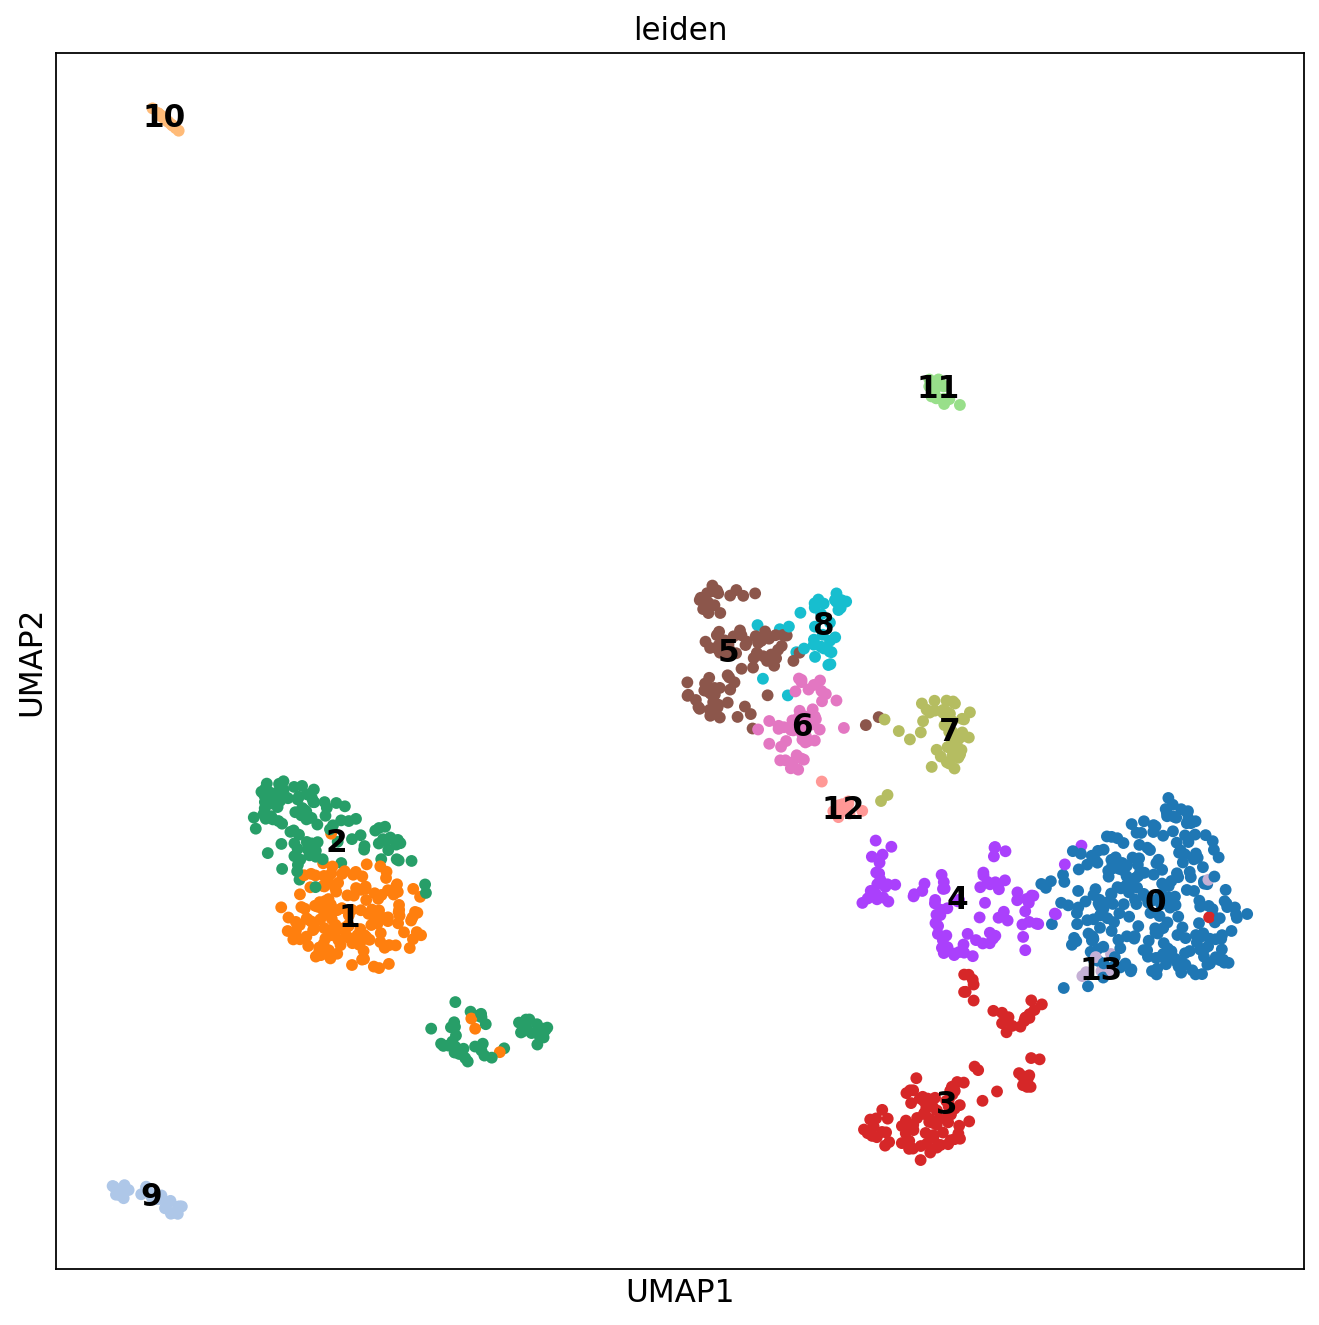

In [111]:
# lets use Leiden clustering
sc.tl.leiden(adata, resolution=0.7)
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data')



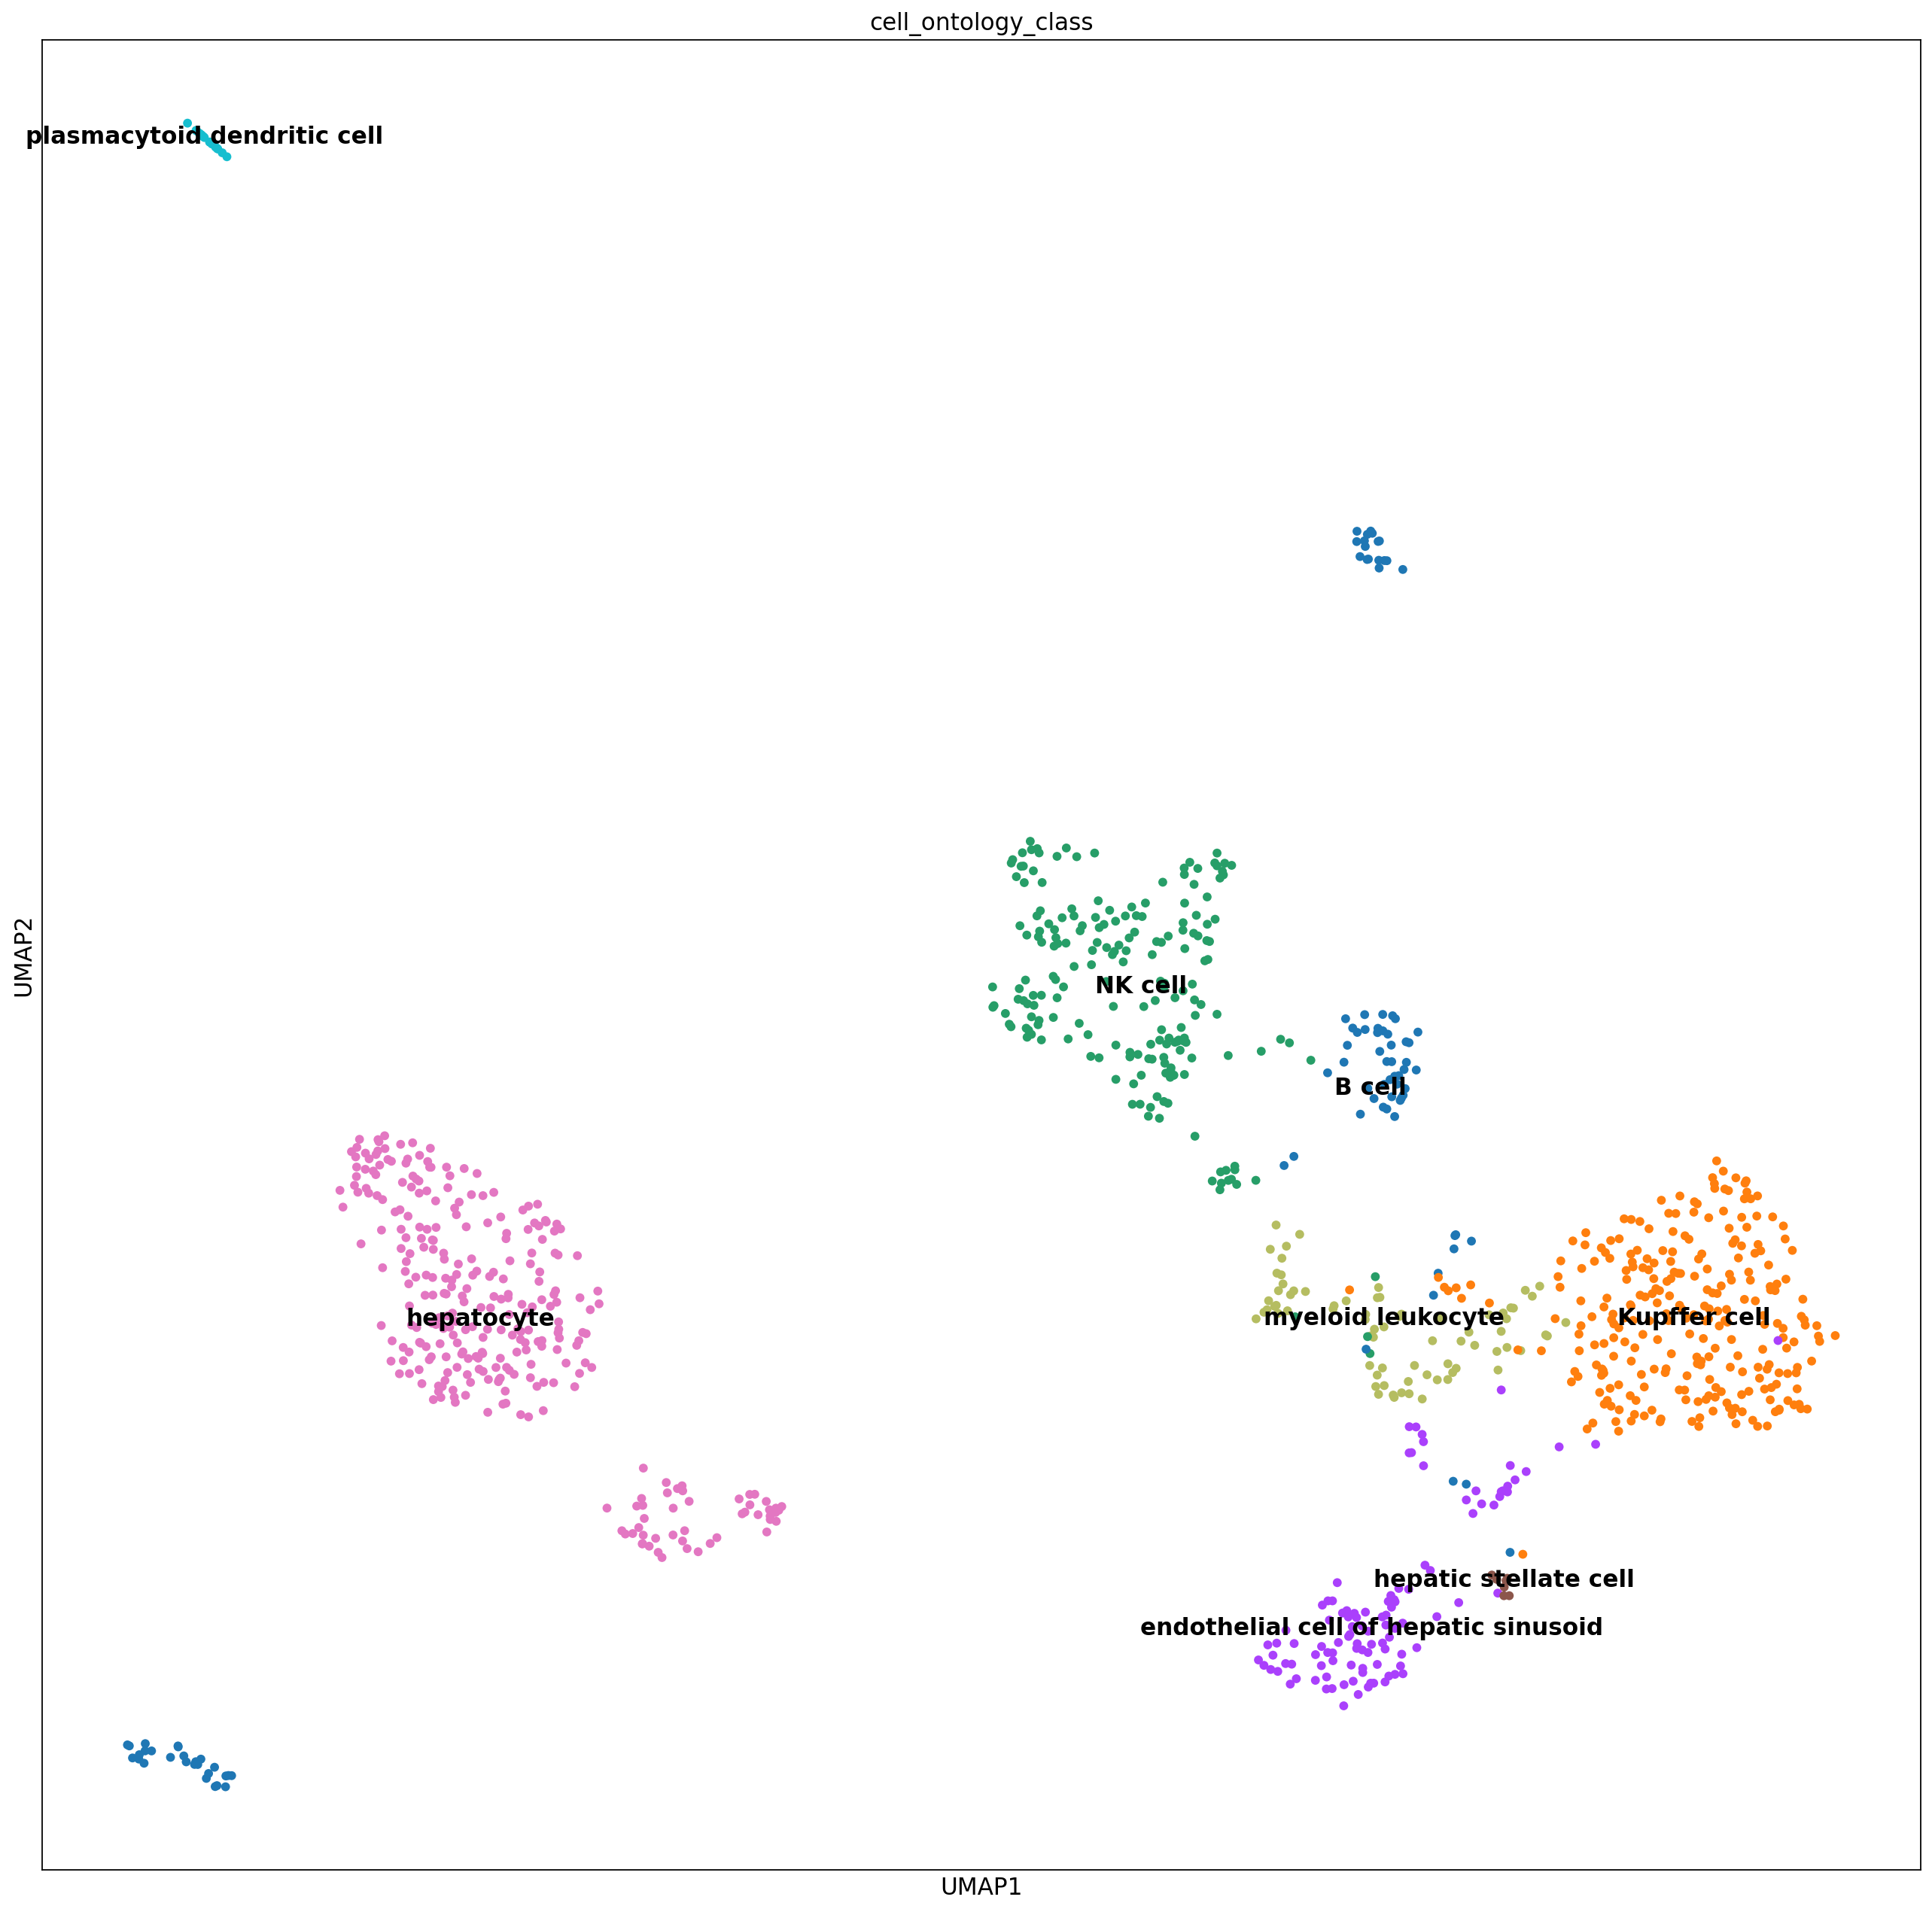

In [112]:
# lets use previously identified clustering
with rc_context({'figure.figsize': (20, 20)}):
    sc.pl.umap(adata, color='cell_ontology_class', legend_loc='on data')


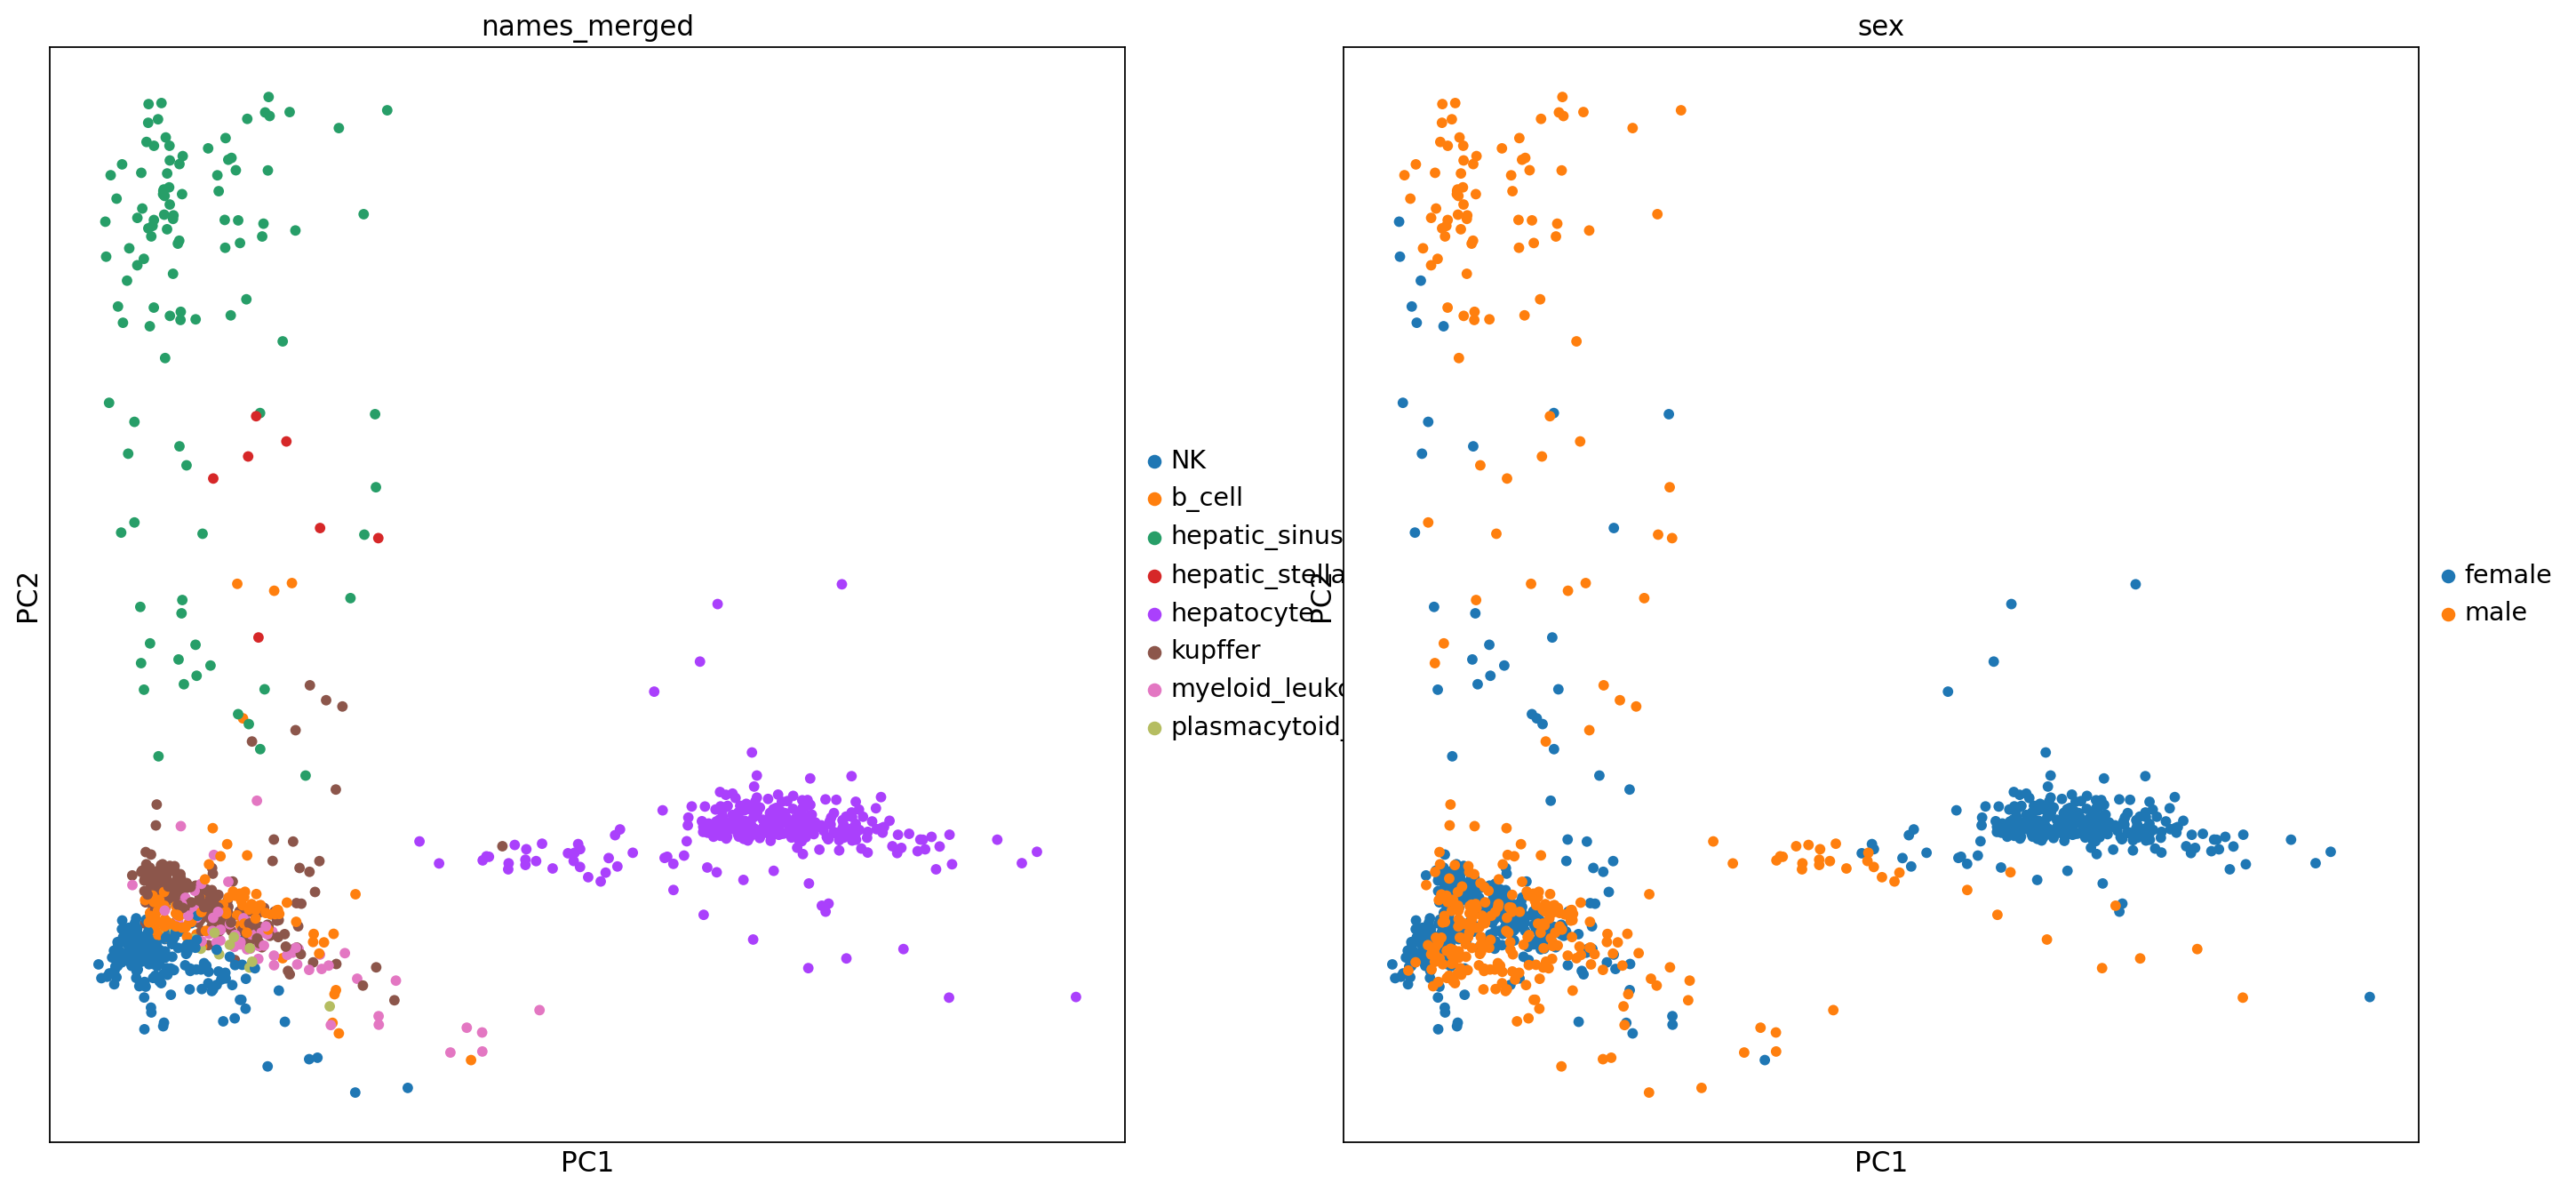

In [113]:
# lets use previously identified clustering
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.pca(adata, color=['names_merged', 'sex'])


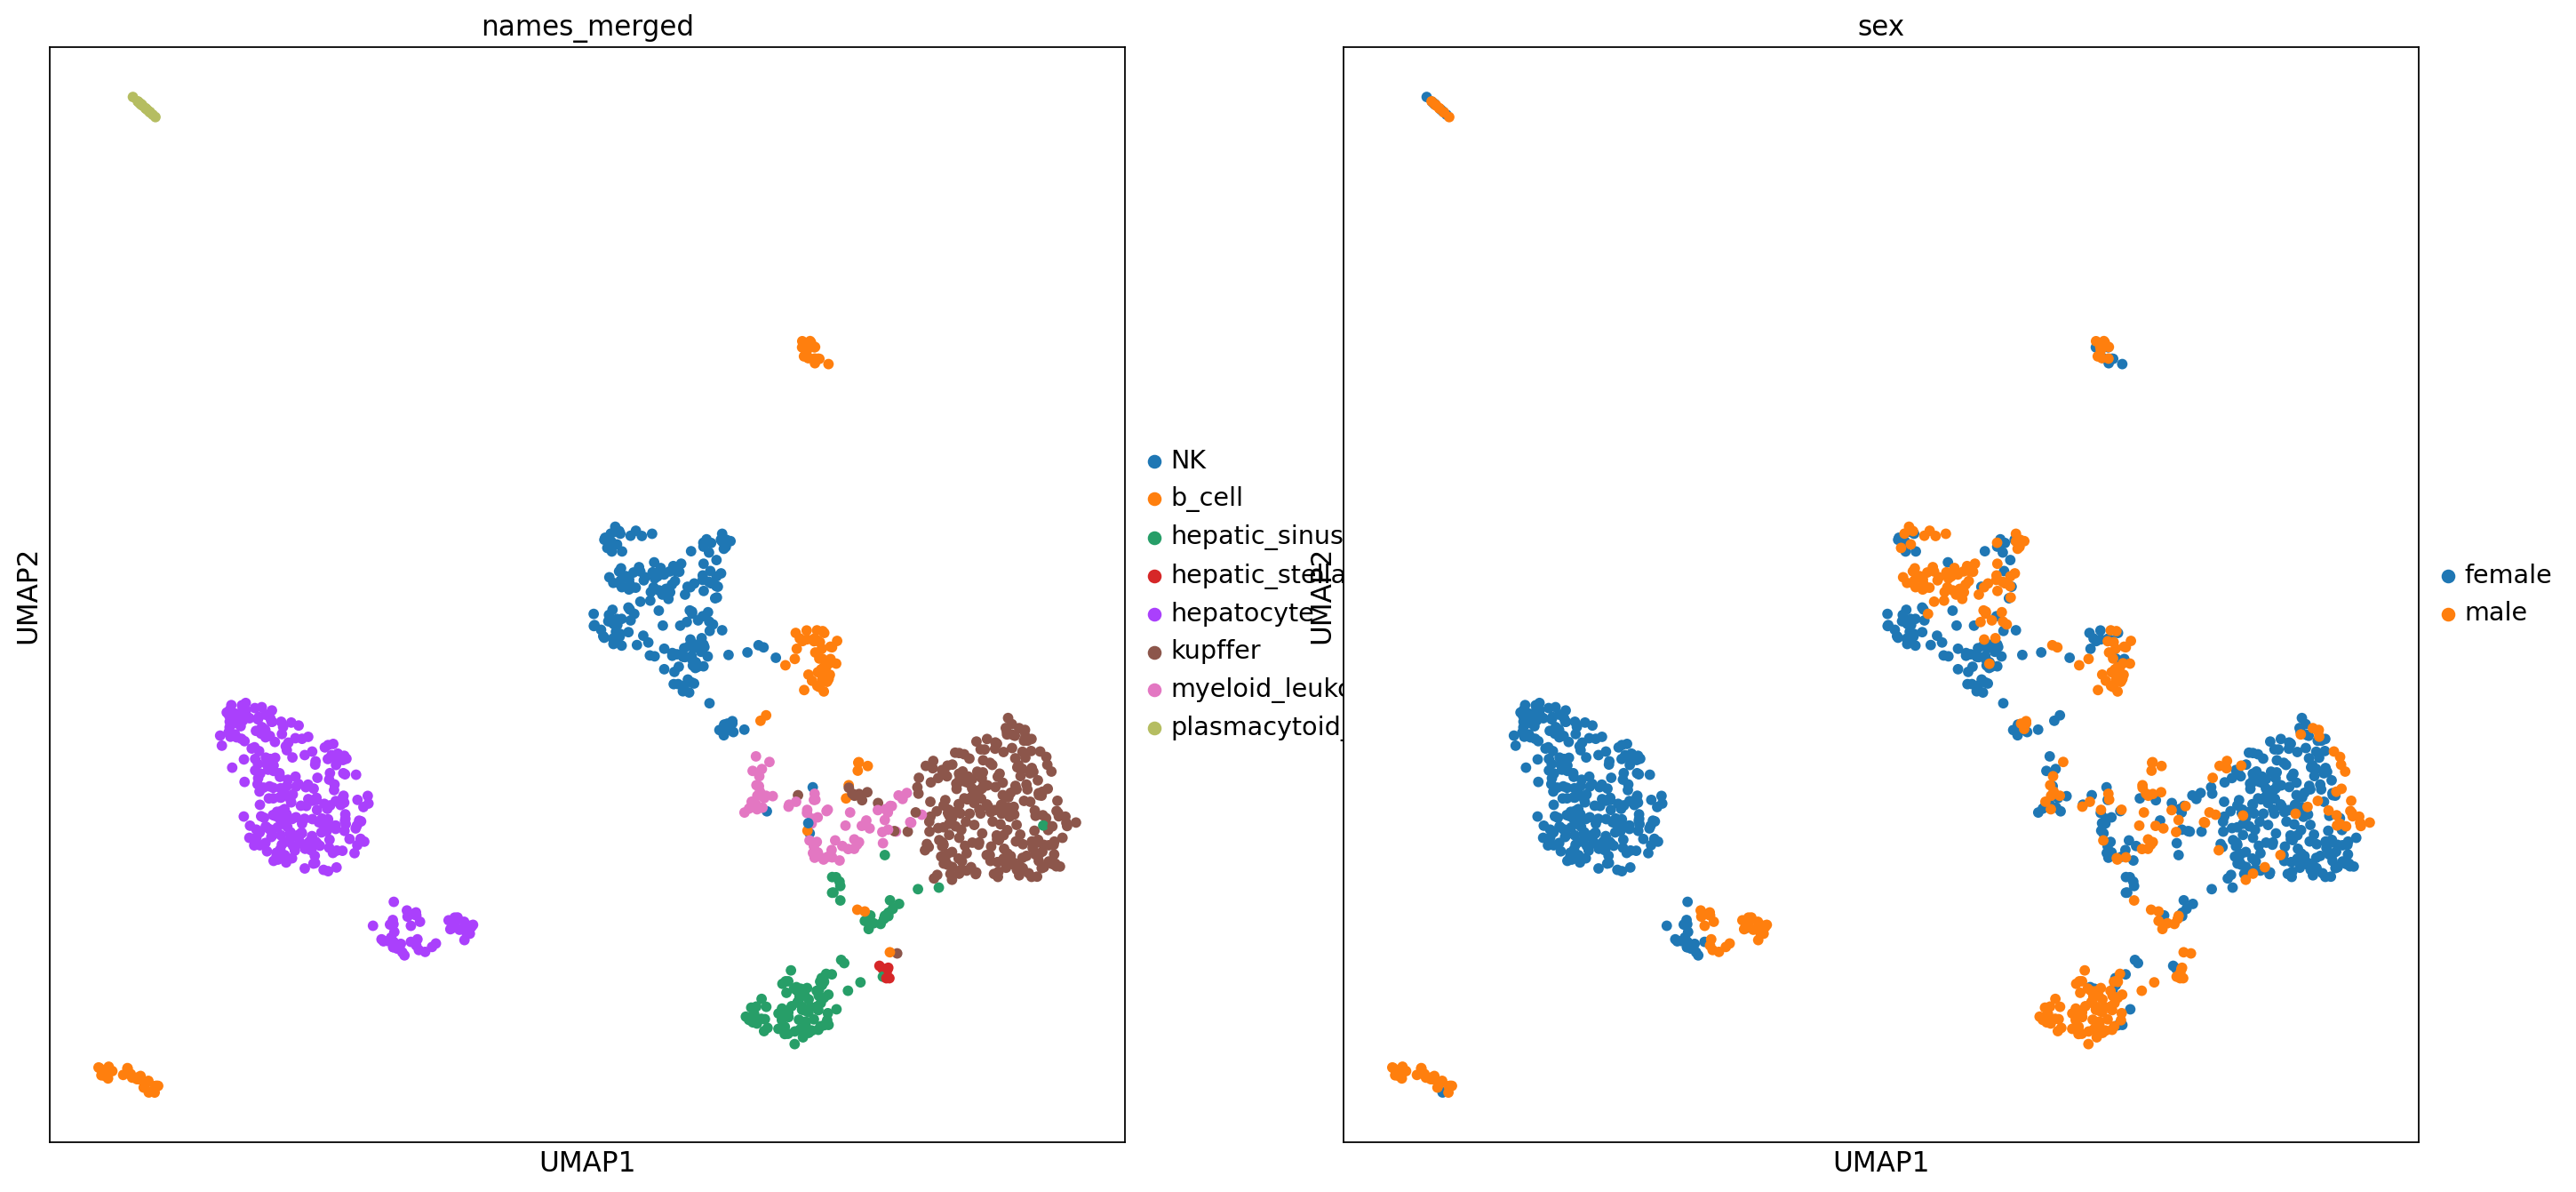

In [114]:
# lets use previously identified clustering
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color=['names_merged', 'sex'])


running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


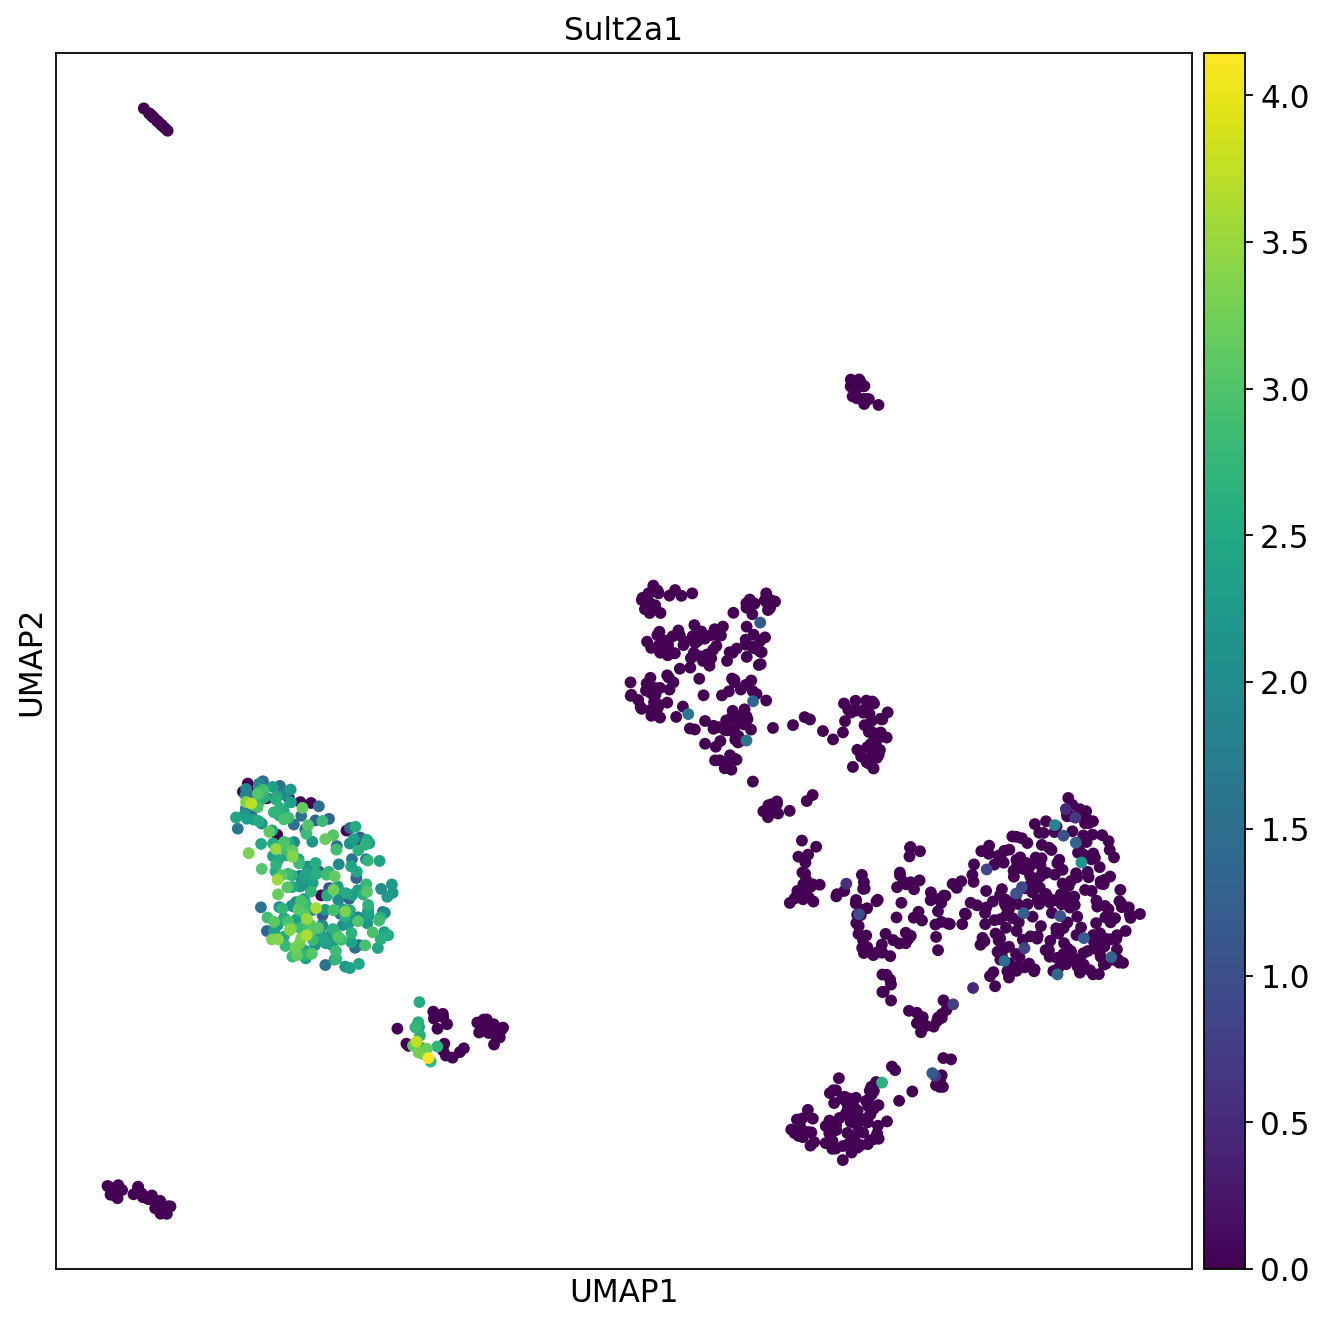

In [115]:
# lets use Leiden clustering
sc.tl.leiden(adata, resolution=0.7)
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='Sult2a1', legend_loc='on data')



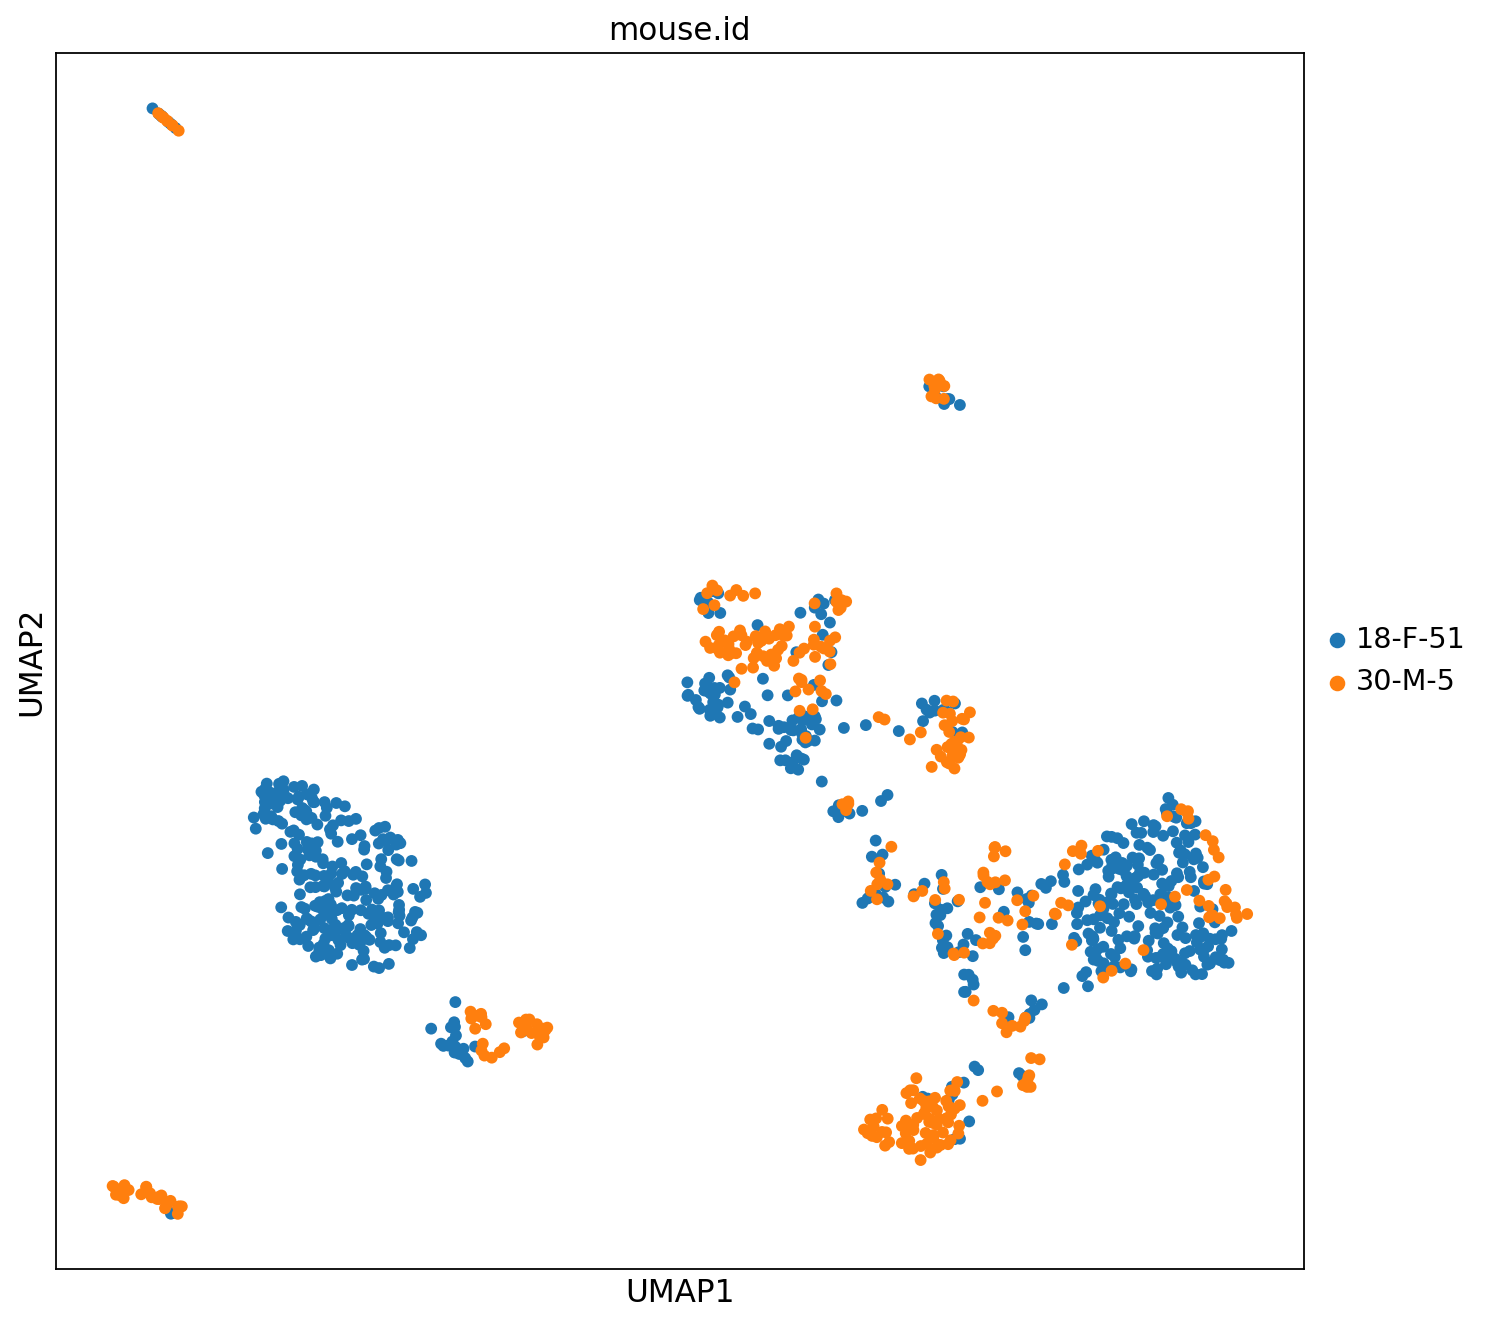

In [116]:
# plot by sample id
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(adata, color='mouse.id')


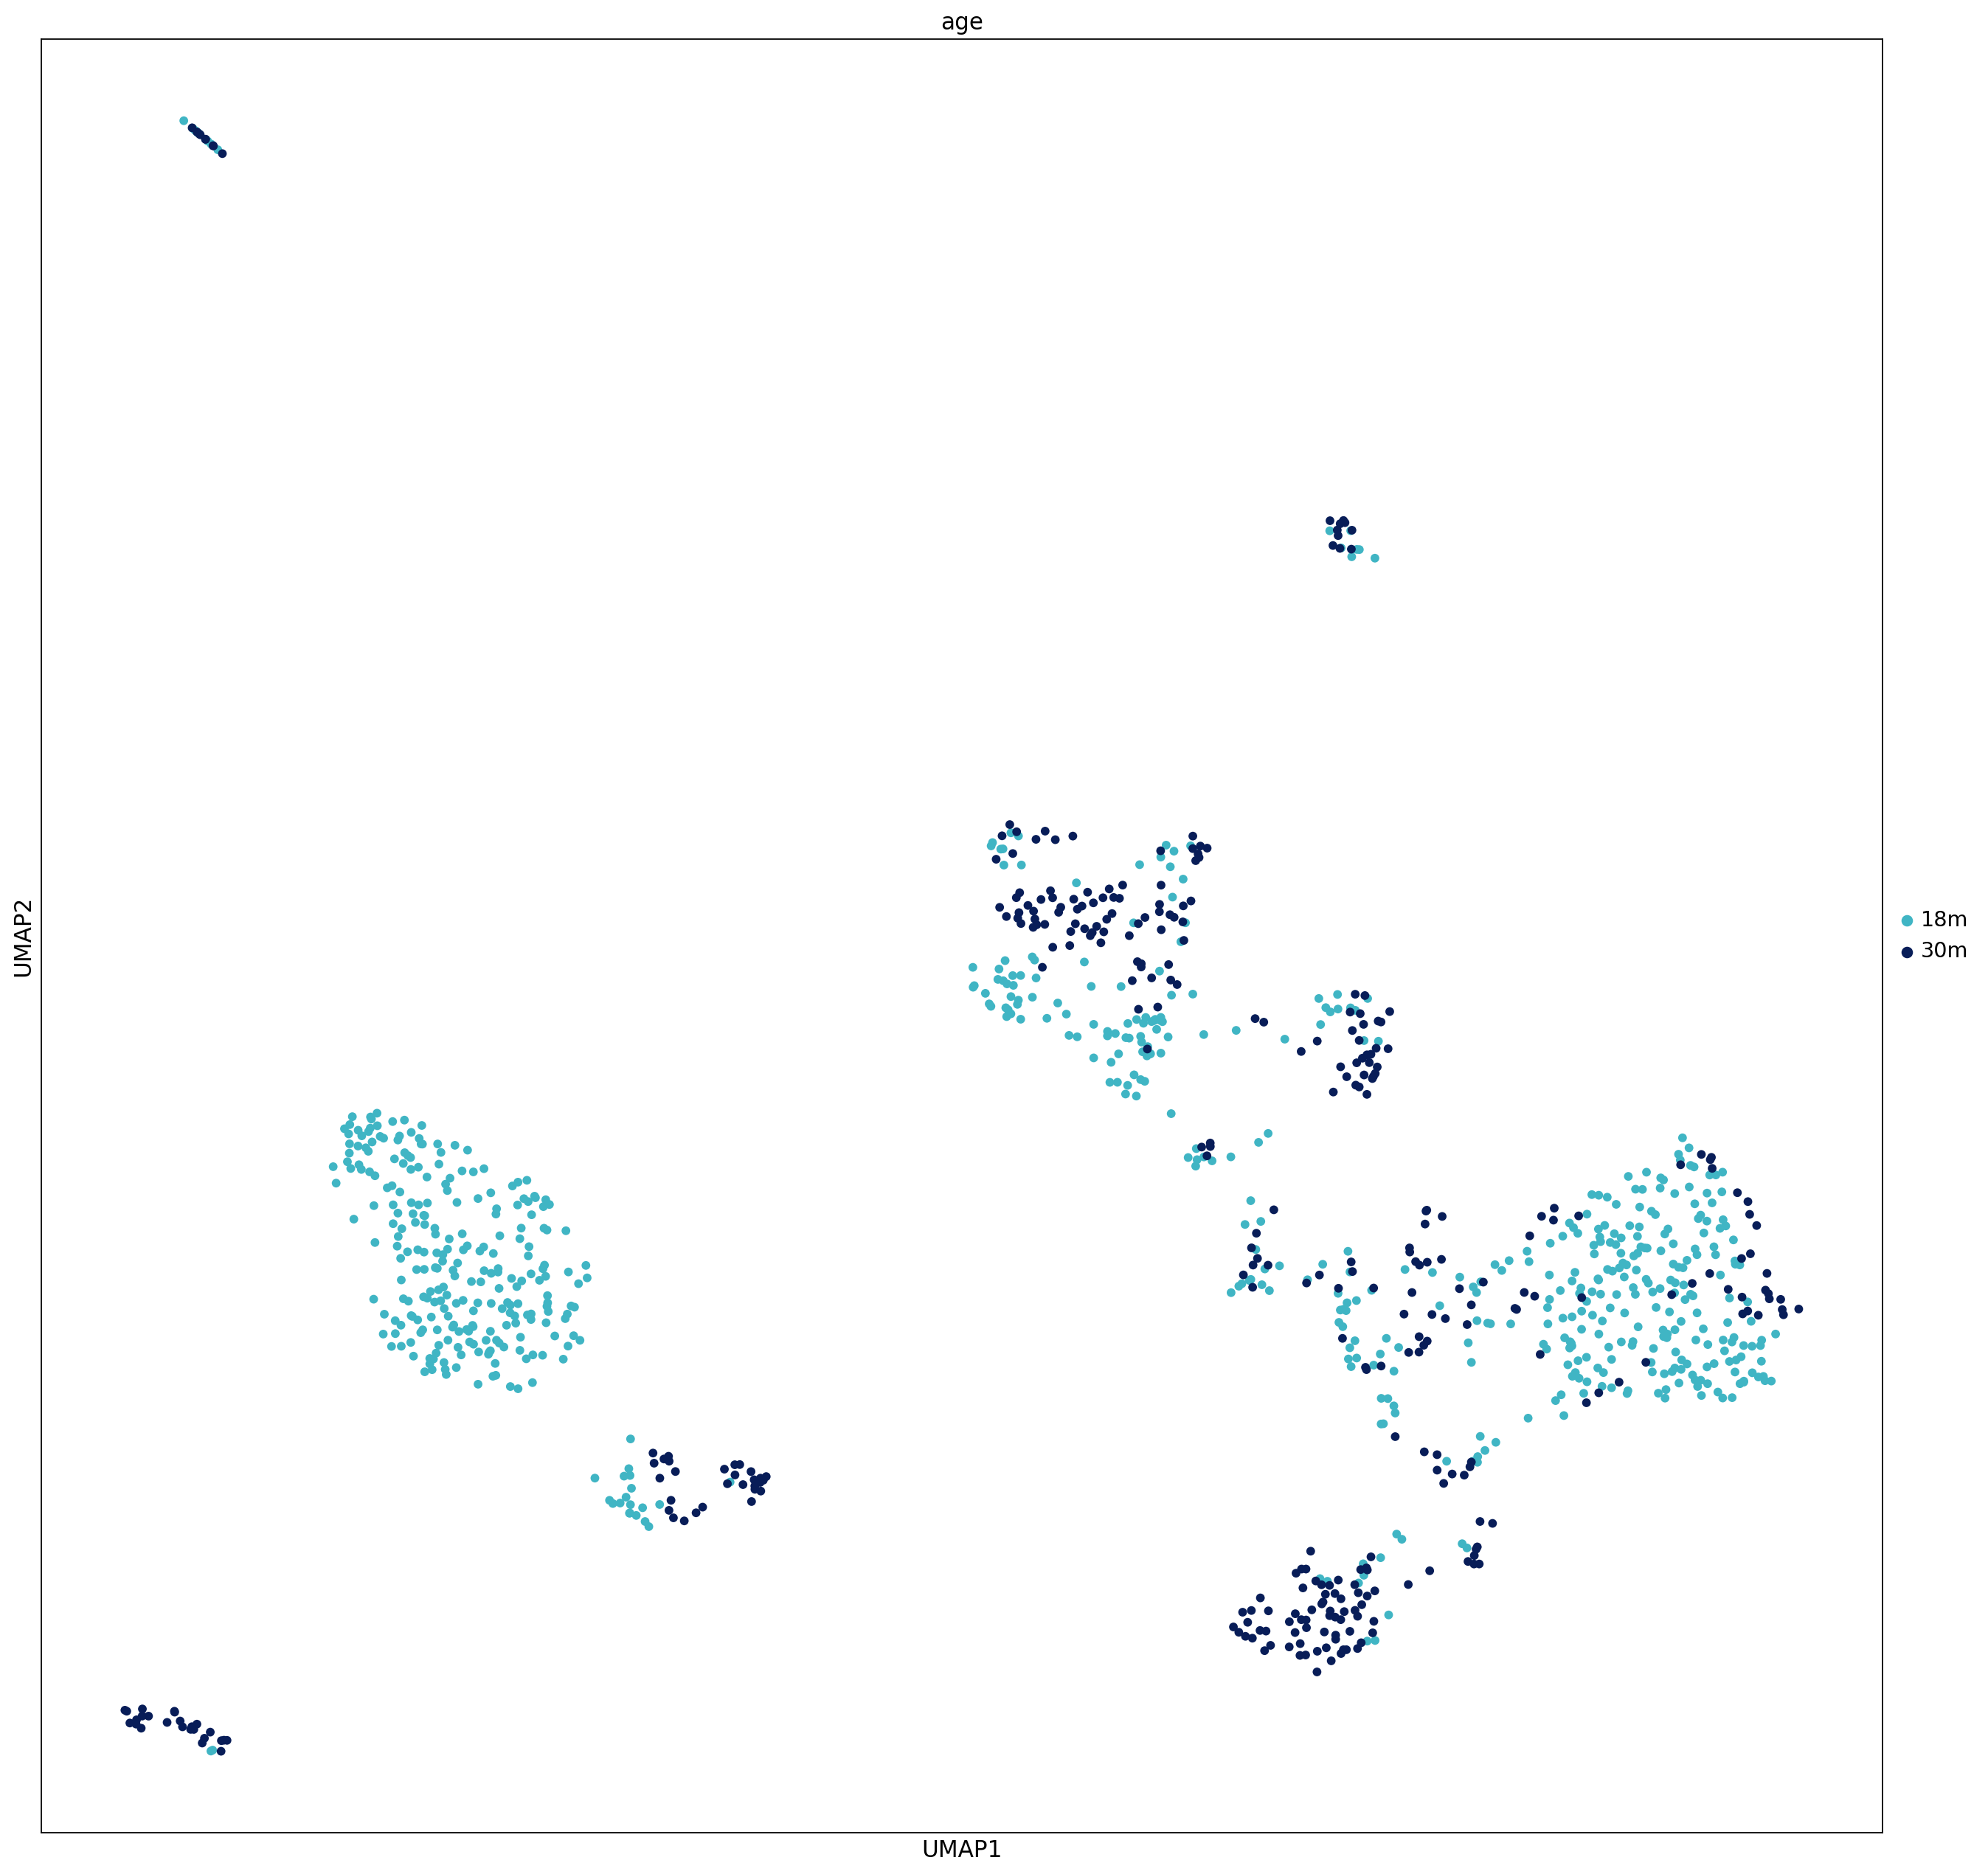

In [117]:
# plot by stimulation
with rc_context({'figure.figsize': (20, 20)}):
    sc.pl.umap(adata, color='age')
